# **Lecture5 homework: wind turbulence statistics**

Name: 张涵煜

Stuent ID: 24S054019

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [8]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

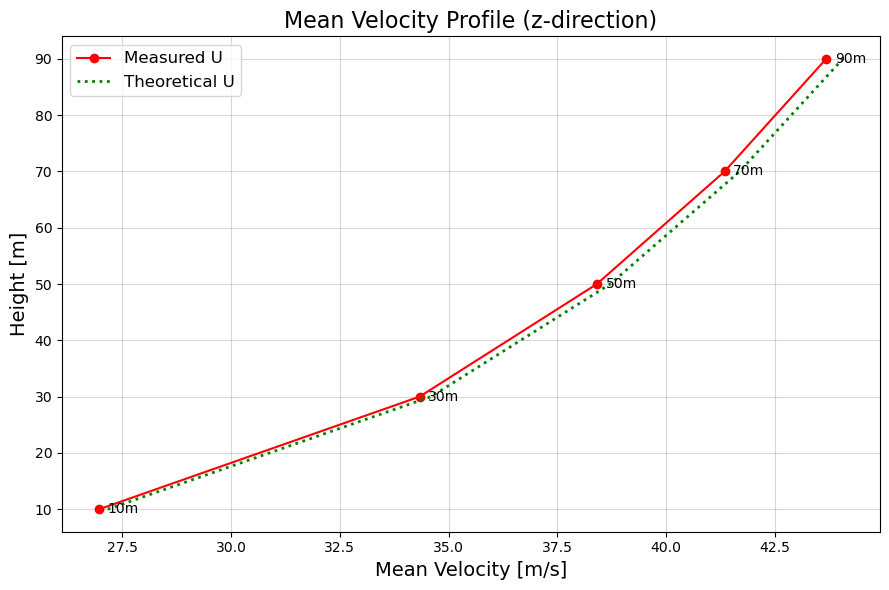

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 维度调整
def adjust_dim(data):
        return data.T if data.shape[0] in (5, 17) else data
U = adjust_dim(U)
V = adjust_dim(V)
W = adjust_dim(W)

# 计算平均风速剖面
def calculate_mean_velocity(u):
    return np.mean(u, axis=0)

# 计算理论平均风速剖面
def theoretical_mean_velocity(z, ur=50.0, zr=160.0, alpha=0.22):
    return ur * (z / zr) ** alpha

# 绘制绘制平均风速剖面对比图
def plot_mean_velocity_profile(z, u_avg_measured, u_avg_theoretical):
    plt.figure(figsize=(9, 6))  # 调整图幅大小
    plt.plot(u_avg_measured, z, 'r-o', linewidth=1.5, markersize=6, label='Measured U')
    plt.plot(u_avg_theoretical, z, 'g:', linewidth=2, label='Theoretical U')
    plt.xlabel('Mean Velocity [m/s]', fontsize=14)  # 增大字体
    plt.ylabel('Height [m]', fontsize=14)
    plt.title('Mean Velocity Profile (z-direction)', fontsize=16)
    plt.grid(True, linestyle='-', alpha=0.5)  # 修改网格线样式
    plt.legend(fontsize=12, loc='upper left')  # 调整图例位置
    for z_val, u_meas in zip(z, u_avg_measured):
        plt.text(u_meas + 0.2, z_val, f'{int(z_val)}m', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# 函数调用
U_avg_measured = calculate_mean_velocity(U)
U_avg_theoretical = theoretical_mean_velocity(Z)
plot_mean_velocity_profile(Z, U_avg_measured, U_avg_theoretical)


#### 1.2 Turbulence intensity profile

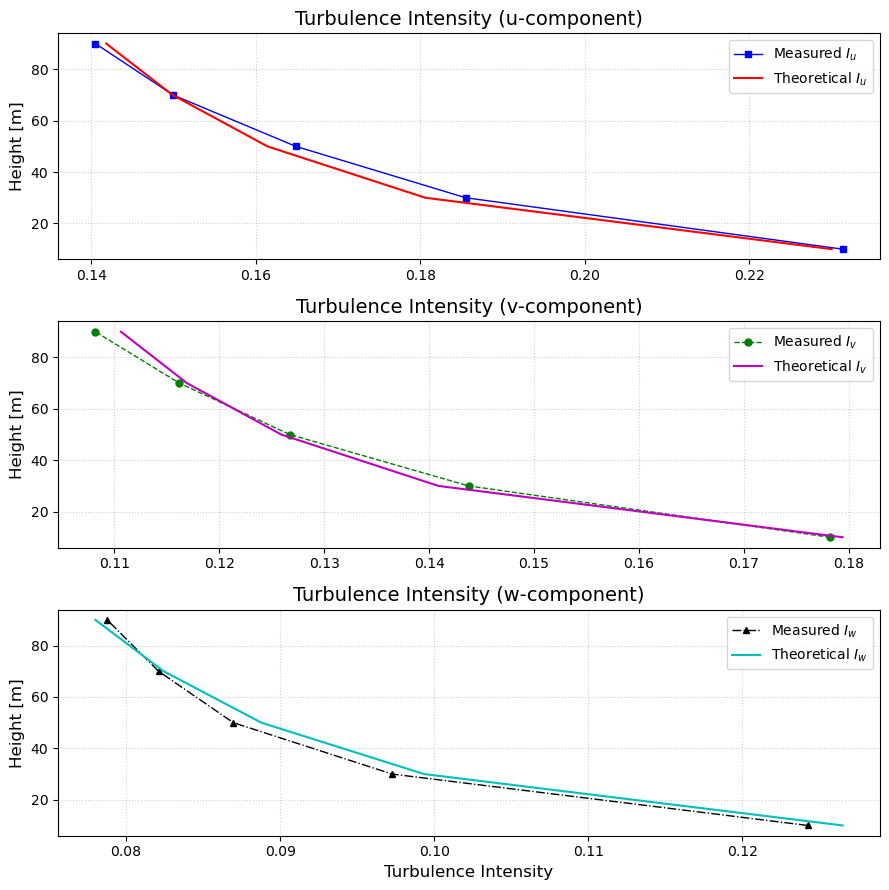

In [10]:

import numpy as np
import matplotlib.pyplot as plt


# 维度调整
def adjust_dim(data):
        return data.T if data.shape[0] in (5, 17) else data
U = adjust_dim(U)
V = adjust_dim(V)
W = adjust_dim(W)

# 计算湍流强度剖面
def calculate_turbulence_intensity(u, v, w):
    u_avg = np.mean(u, axis=0)
    v_avg = np.mean(v, axis=0)
    w_avg = np.mean(w, axis=0)

    u_prime = u - u_avg
    v_prime = v - v_avg
    w_prime = w - w_avg

    sigma_u = np.std(u_prime, axis=0, ddof=1)
    sigma_v = np.std(v_prime, axis=0, ddof=1)
    sigma_w = np.std(w_prime, axis=0, ddof=1)

    iu_measured = sigma_u / u_avg
    iv_measured = sigma_v / u_avg
    iw_measured = sigma_w / u_avg

    return iu_measured, iv_measured, iw_measured

# 计算理论湍流强度剖面
def theoretical_turbulence_intensity(z, i10=0.23, alpha=0.22):
    iu_theoretical = i10 * (z / 10) ** (-alpha)
    iv_theoretical = 0.78 * iu_theoretical
    iw_theoretical = 0.55 * iu_theoretical
    return iu_theoretical, iv_theoretical, iw_theoretical

# 绘制湍流强度剖面对比图
def plot_turbulence_intensity_profile(z, iu_measured, iv_measured, iw_measured,
                                       iu_theoretical, iv_theoretical, iw_theoretical):
    plt.figure(figsize=(9, 9))

    # u分量
    plt.subplot(311)
    plt.plot(iu_measured, z, 'b-s', markersize=5, linewidth=1, label='Measured $I_u$')
    plt.plot(iu_theoretical, z, 'r-', linewidth=1.5, label='Theoretical $I_u$')
    plt.ylabel('Height [m]', fontsize=12)
    plt.title('Turbulence Intensity (u-component)', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    # v分量
    plt.subplot(312)
    plt.plot(iv_measured, z, 'g--o', markersize=5, linewidth=1, label='Measured $I_v$')
    plt.plot(iv_theoretical, z, 'm-', linewidth=1.5, label='Theoretical $I_v$')
    plt.ylabel('Height [m]', fontsize=12)
    plt.title('Turbulence Intensity (v-component)', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    # w分量
    plt.subplot(313)
    plt.plot(iw_measured, z, 'k-.^', markersize=5, linewidth=1, label='Measured $I_w$')
    plt.plot(iw_theoretical, z, 'c-', linewidth=1.5, label='Theoretical $I_w$')
    plt.xlabel('Turbulence Intensity', fontsize=12)
    plt.ylabel('Height [m]', fontsize=12)
    plt.title('Turbulence Intensity (w-component)', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    plt.tight_layout()
    plt.show()


# 计算与绘制
# 确保高度数据已排序
sort_idx = np.argsort(Z)
Z = Z[sort_idx]
U = U[:, sort_idx]
V = V[:, sort_idx]
W = W[:, sort_idx]

Iu_measured, Iv_measured, Iw_measured = calculate_turbulence_intensity(U, V, W)
Iu_theoretical, Iv_theoretical, Iw_theoretical = theoretical_turbulence_intensity(Z)
plot_turbulence_intensity_profile(Z, Iu_measured, Iv_measured, Iw_measured,
                                    Iu_theoretical, Iv_theoretical, Iw_theoretical)

#### 1.3 Wind power spectral density

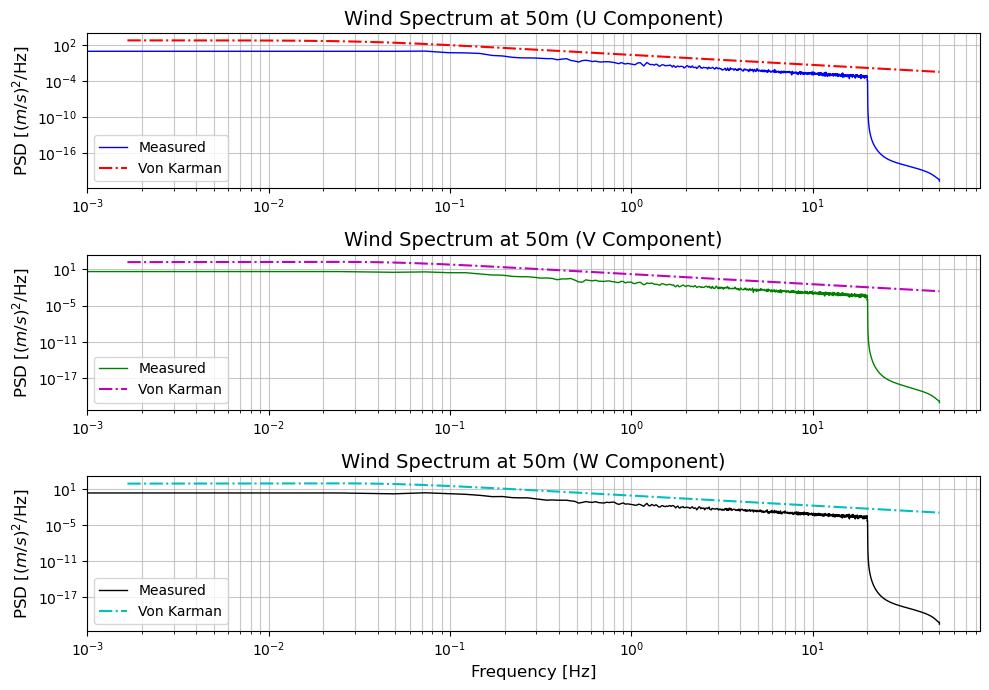

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 维度调整
def adjust_dim(data):
        return data.T if data.shape[0] in (5, 17) else data
U = adjust_dim(U)
V = adjust_dim(V)
W = adjust_dim(W)

# 计算风功率谱密度
def calculate_wind_spectrum(u_ts, v_ts, w_ts, fs, nperseg=4096):
    """使用Welch方法计算风功率谱密度."""
    f_meas, su_meas = signal.welch(u_ts, fs=fs, nperseg=nperseg, scaling='spectrum')
    _, sv_meas = signal.welch(v_ts, fs=fs, nperseg=nperseg, scaling='spectrum')
    _, sw_meas = signal.welch(w_ts, fs=fs, nperseg=nperseg, scaling='spectrum')
    return f_meas, su_meas, sv_meas, sw_meas

# 计算冯·卡门谱
def von_karman_spectrum(f, u_avg, iu, iv, iw, lux, lvx, lwx):
    def von_karman_u(f, u_avg, iu, lux):
        numerator = 4 * (iu * u_avg) ** 2 * (lux / u_avg)
        denominator = (1 + 70.8 * (f * lux / u_avg) ** 2) ** (5 / 6)
        return numerator / denominator

    def von_karman_vw(f, u_avg, i, lx):
        term = 2 * f * lx / u_avg
        numerator = 4 * (i * u_avg) ** 2 * (lx / u_avg) * (1 + 188.4 * term ** 2)
        denominator = (1 + 70.8 * term ** 2) ** (11 / 6)
        return numerator / denominator

    su_theory = von_karman_u(f, u_avg, iu, lux)
    sv_theory = von_karman_vw(f, u_avg, iv, lvx)
    sw_theory = von_karman_vw(f, u_avg, iw, lwx)
    return su_theory, sv_theory, sw_theory

# 绘制风功率谱密度图
def plot_wind_spectrum(f_meas, su_meas, sv_meas, sw_meas,
                        f_theory, su_theory, sv_theory, sw_theory, target_height):
    plt.figure(figsize=(10, 7))

    # U分量
    plt.subplot(311)
    plt.loglog(f_meas, su_meas, 'b-', linewidth=1, label='Measured')
    plt.loglog(f_theory, su_theory, 'r-.', linewidth=1.5, label='Von Karman')
    plt.title(f'Wind Spectrum at {target_height}m (U Component)', fontsize=14)
    plt.ylabel('PSD [($m/s$)$^2$/Hz]', fontsize=12)
    plt.grid(True, which='both', linestyle='-', alpha=0.7)
    plt.legend(fontsize=10)

    # V分量
    plt.subplot(312)
    plt.loglog(f_meas, sv_meas, 'g-', linewidth=1, label='Measured')
    plt.loglog(f_theory, sv_theory, 'm-.', linewidth=1.5, label='Von Karman')
    plt.title(f'Wind Spectrum at {target_height}m (V Component)', fontsize=14)
    plt.ylabel('PSD [($m/s$)$^2$/Hz]', fontsize=12)
    plt.grid(True, which='both', linestyle='-', alpha=0.7)
    plt.legend(fontsize=10)

    # W分量
    plt.subplot(313)
    plt.loglog(f_meas, sw_meas, 'k-', linewidth=1, label='Measured')
    plt.loglog(f_theory, sw_theory, 'c-.', linewidth=1.5, label='Von Karman')
    plt.title(f'Wind Spectrum at {target_height}m (W Component)', fontsize=14)
    plt.xlabel('Frequency [Hz]', fontsize=12)
    plt.ylabel('PSD [($m/s$)$^2$/Hz]', fontsize=12)
    plt.grid(True, which='both', linestyle='-', alpha=0.7)  # 对数坐标网格
    plt.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

# 计算与绘图 
target_height = 50
point_idx = np.where(Z == target_height)[0][0]

fs = 1 / dt
u_ts = U[:, point_idx]
v_ts = V[:, point_idx]
w_ts = W[:, point_idx]

u_avg = np.mean(u_ts)
iu = np.std(u_ts) / u_avg
iv = np.std(v_ts) / u_avg
iw = np.std(w_ts) / u_avg

lux = 100 * (target_height / 30) ** 0.5
lvx = 0.5 * lux
lwx = 0.5 * lux

f_meas, Su_meas, Sv_meas, Sw_meas = calculate_wind_spectrum(u_ts, v_ts, w_ts, fs)
f_theory = np.fft.rfftfreq(len(u_ts), d=dt)[1:]  # 排除0频率

Su_theory, Sv_theory, Sw_theory = von_karman_spectrum(f_theory, u_avg, iu, iv, iw, lux, lvx, lwx)
plot_wind_spectrum(f_meas, Su_meas, Sv_meas, Sw_meas,
                    f_theory, Su_theory, Sv_theory, Sw_theory, target_height)

#### 1.4 Probability density curve

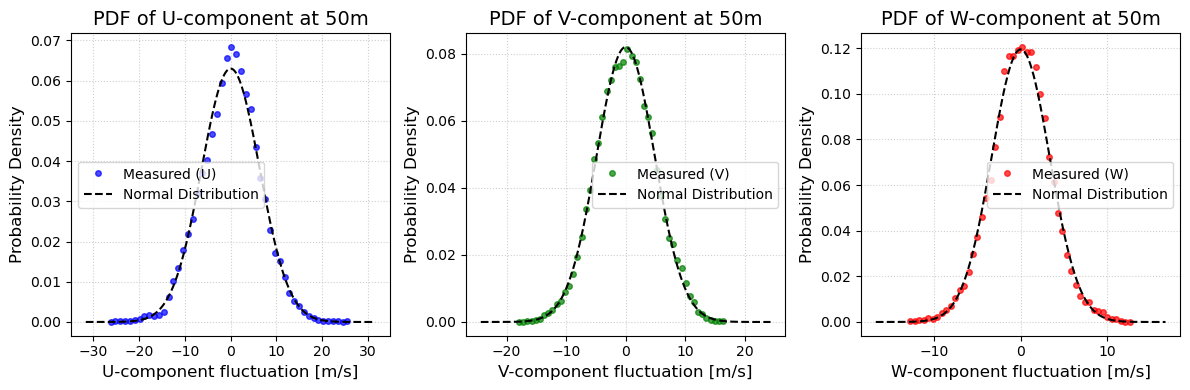

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 维度调整
def adjust_dim(data):
        return data.T if data.shape[0] in (5, 17) else data
U = adjust_dim(U)
V = adjust_dim(V)
W = adjust_dim(W)

# 计算指定点的脉动风速
def calculate_fluctuating_velocity(u, v, w, point_idx):
    u_avg = np.mean(u[:, point_idx])
    v_avg = np.mean(v[:, point_idx])
    w_avg = np.mean(w[:, point_idx])
    u_prime = u[:, point_idx] - u_avg
    v_prime = v[:, point_idx] - v_avg
    w_prime = w[:, point_idx] - w_avg
    return u_prime, v_prime, w_prime

# 绘制概率密度分布图
def plot_pdf_component(data, component, color, target_z):
    mu = 0  # 脉动速度均值为0
    sigma = np.std(data)

    # 生成理论正态分布
    x = np.linspace(-5 * sigma, 5 * sigma, 300)
    pdf_normal = stats.norm.pdf(x, mu, sigma)

    # 计算数据直方图
    hist, bin_edges = np.histogram(data, bins=50, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # 绘图
    plt.plot(bin_centers, hist, 'o', color=color, markersize=4, alpha=0.7,
             label=f'Measured ({component})')  # 修改样式
    plt.plot(x, pdf_normal, '--', color='k', linewidth=1.5,
             label='Normal Distribution')
    plt.xlabel(f'{component}-component fluctuation [m/s]', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.title(f'PDF of {component}-component at {target_z}m', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)  # 修改网格线样式

# 计算与绘图
def plot_probability_density(u_prime, v_prime, w_prime, target_z):
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plot_pdf_component(u_prime, 'U', 'b', target_z)

    plt.subplot(132)
    plot_pdf_component(v_prime, 'V', 'g', target_z)

    plt.subplot(133)
    plot_pdf_component(w_prime, 'W', 'r', target_z)

    plt.tight_layout()
    plt.show()

# 函数调用
target_z = 50
point_idx = np.where(Z == target_z)[0][0]

u_prime, v_prime, w_prime = calculate_fluctuating_velocity(U, V, W, point_idx)
plot_probability_density(u_prime, v_prime, w_prime, target_z)

### 2 Statistical results of the y-direction wind velocity time history

In [13]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

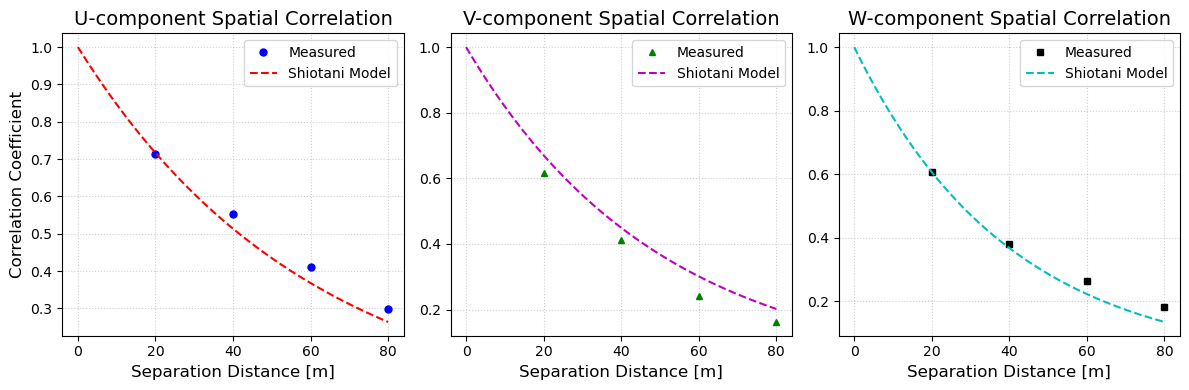

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 维度调整
def adjust_dim(data):
        return data.T if data.shape[0] in (5, 17) else data
U = adjust_dim(U)
V = adjust_dim(V)
W = adjust_dim(W)
Y = Y.flatten()  # 确保Y为一维数组
Z = Z.flatten()  # 确保Z为一维数组


# 计算脉动风速
def calculate_fluctuations(vel):
    return vel - np.mean(vel, axis=0)

# 计算空间相关系数
def spatial_correlation(ref_idx, prime_data, y_coords):
    ref_series = prime_data[:, ref_idx]
    corr_coeffs = []
    distances = []

    for i in range(prime_data.shape[1]):
        if i == ref_idx:
            continue
        target_series = prime_data[:, i]
        corr = np.corrcoef(ref_series, target_series)[0, 1]
        corr_coeffs.append(corr)
        distances.append(abs(y_coords[i] - y_coords[ref_idx]))

    return np.array(distances), np.array(corr_coeffs)

# Shiotani 空间相关系数模型
def shiotani_model(r, ly):
    return np.exp(-np.abs(r) / ly)

# 绘制空间相关系数图
def plot_spatial_correlation(dist_u, rho_u, dist_v, rho_v, dist_w, rho_w,
                              r, rho_u_theory, rho_v_theory, rho_w_theory):
    plt.figure(figsize=(12, 4))

    # u分量
    plt.subplot(131)
    plt.plot(dist_u, rho_u, 'bo', markersize=5, label='Measured')
    plt.plot(r, rho_u_theory, 'r--', linewidth=1.5, label='Shiotani Model')
    plt.xlabel('Separation Distance [m]', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.title('U-component Spatial Correlation', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    # v分量
    plt.subplot(132)
    plt.plot(dist_v, rho_v, 'g^', markersize=5, label='Measured')
    plt.plot(r, rho_v_theory, 'm--', linewidth=1.5, label='Shiotani Model')
    plt.xlabel('Separation Distance [m]', fontsize=12)
    plt.title('V-component Spatial Correlation', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    # w分量
    plt.subplot(133)
    plt.plot(dist_w, rho_w, 'ks', markersize=5, label='Measured')
    plt.plot(r, rho_w_theory, 'c--', linewidth=1.5, label='Shiotani Model')
    plt.xlabel('Separation Distance [m]', fontsize=12)
    plt.title('W-component Spatial Correlation', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(fontsize=10)

    plt.tight_layout()
    plt.show()


# 计算与绘图
ref_y = 0
ref_z = 50
ref_idx = np.where((Y == ref_y) & (Z == ref_z))[0][0]
y_coords = Y

u_prime = calculate_fluctuations(U)
v_prime = calculate_fluctuations(V)
w_prime = calculate_fluctuations(W)

dist_u, rho_u = spatial_correlation(ref_idx, u_prime, y_coords)
dist_v, rho_v = spatial_correlation(ref_idx, v_prime, y_coords)
dist_w, rho_w = spatial_correlation(ref_idx, w_prime, y_coords)

ly_u = 60
ly_v = 50
ly_w = 40
r = np.linspace(0, max(y_coords), 100)
rho_u_theory = shiotani_model(r, ly_u)
rho_v_theory = shiotani_model(r, ly_v)
rho_w_theory = shiotani_model(r, ly_w)

plot_spatial_correlation(dist_u, rho_u, dist_v, rho_v, dist_w, rho_w,
                            r, rho_u_theory, rho_v_theory, rho_w_theory)
